<a href="https://colab.research.google.com/github/elbasri/Data_Sciences/blob/main/ABDENNACER_Elbasri_M1DS_Controle_Algorithmique_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **Contrôle**

> **Algorithmique & Programmation Python**

---

*   ABDENNACER Elbasri
*   Master1 : DS & IA
*   Date: 23/11/2023



In [ ]:
#Import les lib necessaires pour l'emsemble des exercices
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd




---


##Exercice 1:

> Vérifier si un nombre est parfait ou non




---




In [ ]:
#calculer la somme de tt diviseur de n
def nParfait(n):
  sum = 0
  for i in range(n):
    if i != 0 and n % i == 0:
      sum += i
  return sum
nParfait(6)

6

In [ ]:
#Test pour n = 6
n = 6
if n == nParfait(n):
    print("{} est un nombre parfait".format(n))
else:
    print("{} n'est pas un nombre parfait".format(n))

6 est un nombre parfait


In [ ]:
#Test pour n = 7
n = 7
if n == nParfait(n):
    print("{} est un nombre parfait".format(n))
else:
    print("{} n'est pas un nombre parfait".format(n))

7 n'est pas un nombre parfait




---


##Exercice 2:

> Dictionnaire d'occurrences des caracteres



---



In [ ]:
#La fonction
def dOccurrences(s):
    return dict(Counter(s))

In [ ]:
#dict. d'occurences de l'exemple "Abdennacer"
text = "Abdennacer"
dOccurrences(text)

{'A': 1, 'b': 1, 'd': 1, 'e': 2, 'n': 2, 'a': 1, 'c': 1, 'r': 1}



---


##Exercice 3:

> Matrice de Hadamard



---



In [ ]:
#fonction hadamard
def hadamard(n):
  if n <= 0:
    return [False, "le nombre n doit etre un entier positif"]

  if (n & (n - 1)) != 0:
    return [False, "n doit etre obligatoirement une puissance de 2"]

  if n == 1:
    #si 1 donc la matrice est [[1]]
    return np.array([[1]])

  #renvoie le plus grand entier <= de division de n sur 2 (cet entier est le nouveau nombre n)
  hN2 = hadamard(n // 2)

  #construire et combiner les matrices de blocs
  t = np.concatenate((hN2, hN2), axis=1)
  d = np.concatenate((hN2, -hN2), axis=1)

  #notre matrice finale
  matrice = np.concatenate((t, d), axis=0)

  return matrice

In [ ]:
#test pour 4
n = 4
matrice = hadamard(n)
if matrice[0] is False:
  print(matrice[1])
else:
  print("La matrice Hadamard de {} est \n {} ".format(n, matrice))

La matrice Hadamard de 4 est 
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]] 


In [ ]:
#test pour 0 (cas d'erreur)
n = 0
matrice = hadamard(n)
if matrice[0] is False:
  print(matrice[1])
else:
  print("La matrice Hadamard de {} est \n {} ".format(n, matrice))

le nombre n doit etre un entier positif


In [ ]:
#test pour 8
n = 8
matrice = hadamard(n)
if matrice[0] is False:
  print(matrice[1])
else:
  print("La matrice Hadamard de {} est \n {} ".format(n, matrice))

La matrice Hadamard de 8 est 
 [[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]] 




---


##Exercice 4:

> Chargement des donnees d'un fichier CSV avec pandas, ajout d'un colonne puis trace les courbes (x,y) et (x,z)



---



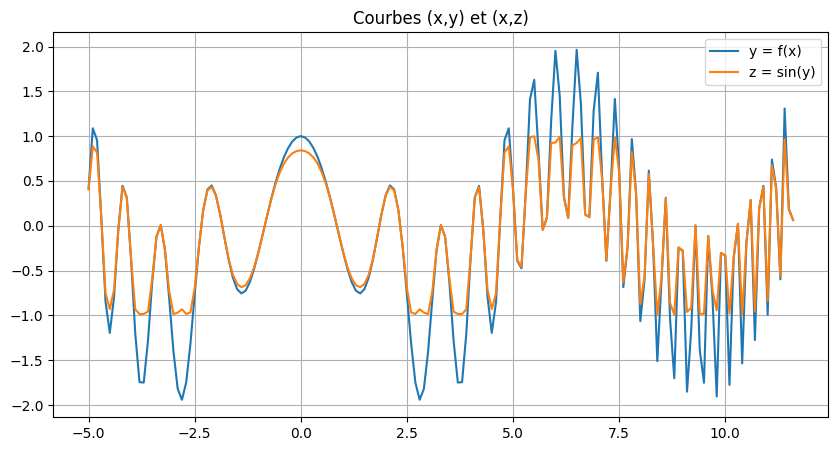

In [ ]:
#chargement des données
val = pd.read_csv('val.csv', sep=";")

#+'z' = sinus de 'y'
val['z'] = np.sin(val['y'])

plt.figure(figsize=(10, 5))
plt.title('Courbes (x,y) et (x,z)')
#(x, y)
plt.plot(val['x'], val['y'], label='y = f(x)')
#(x, z)
plt.plot(val['x'], val['z'], label='z = sin(y)')

plt.legend()
plt.grid()

#c'est pas necessaire avec jupyter ou google colab
#mais c'est obligatoire d'executer show() lorsque je travaille avec l'IDE vsCode et son plugin de pyplot
plt.show()



---


##Exercice 5: Courbe de la fonction f(x; sigma^2)




---



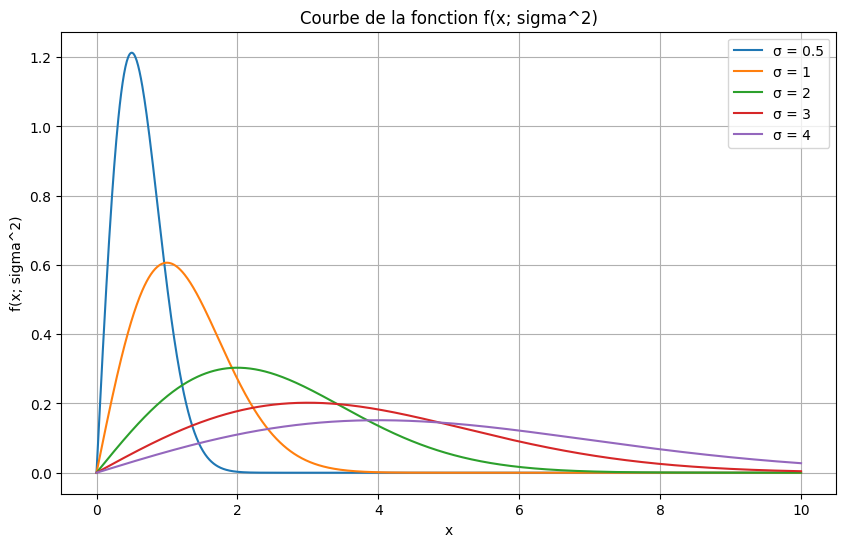

In [ ]:
#la fonction f(x; sigma^2)
def f(x, sigma):
    return (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

liste = np.linspace(0, 10, 1000)
listeSigma = [0.5, 1, 2, 3, 4]

plt.figure(figsize=(10, 6))

for sigma in listeSigma:
    plt.plot(liste, f(liste, sigma), label=f'σ = {sigma}')

plt.title('Courbe de la fonction f(x; sigma^2)')
plt.xlabel('x')
plt.ylabel('f(x; sigma^2)')
plt.legend()
plt.grid()

plt.grid(True)
plt.show()



---


##Exercice 6:

> Courbe de la fonction y pour differentes valeurs de x



---



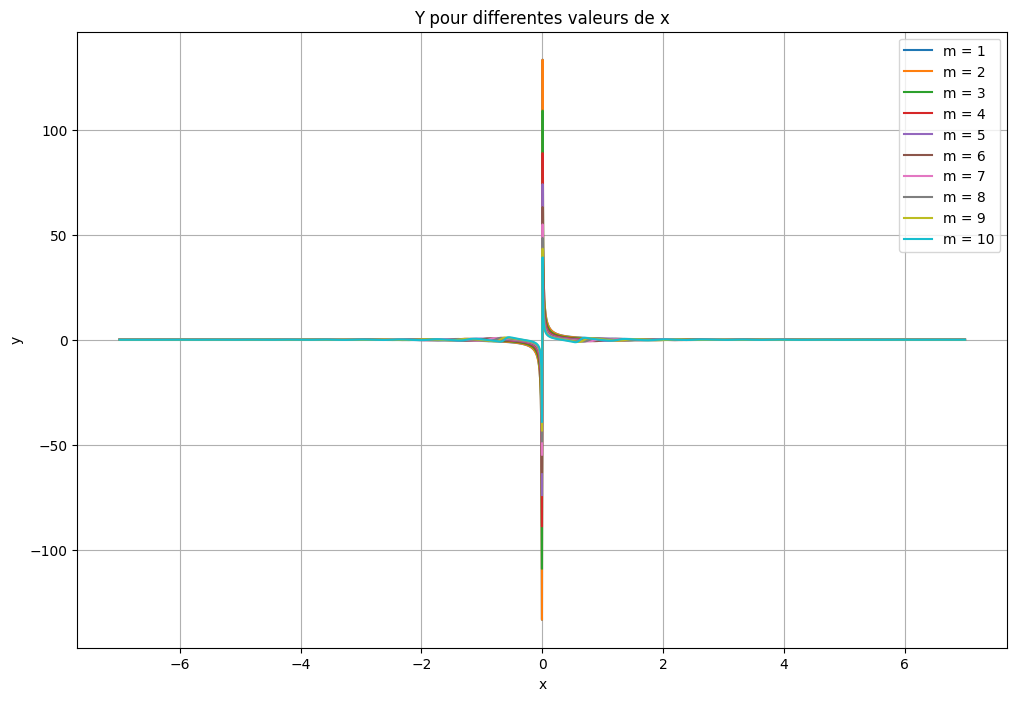

In [114]:
#la fonction y
def y(m, x):
    return np.sin(m * x) / (x**2 - np.cos(m * x) + 1)

xVals = np.linspace(-7, 7, 1400)
ms = range(1, 11)

plt.figure(figsize=(12, 8))

for m in ms:
    #eviter les zeros
    xValsNonZero = xVals[xVals != 0]
    plt.plot(xValsNonZero, y(m, xValsNonZero), label=f'm = {m}')

#Tracage de courbe
plt.title('Y pour differentes valeurs de x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



---


##Exercice 7:

> Tracage des fonctions f(x), g(x), h(x), k(x)



---



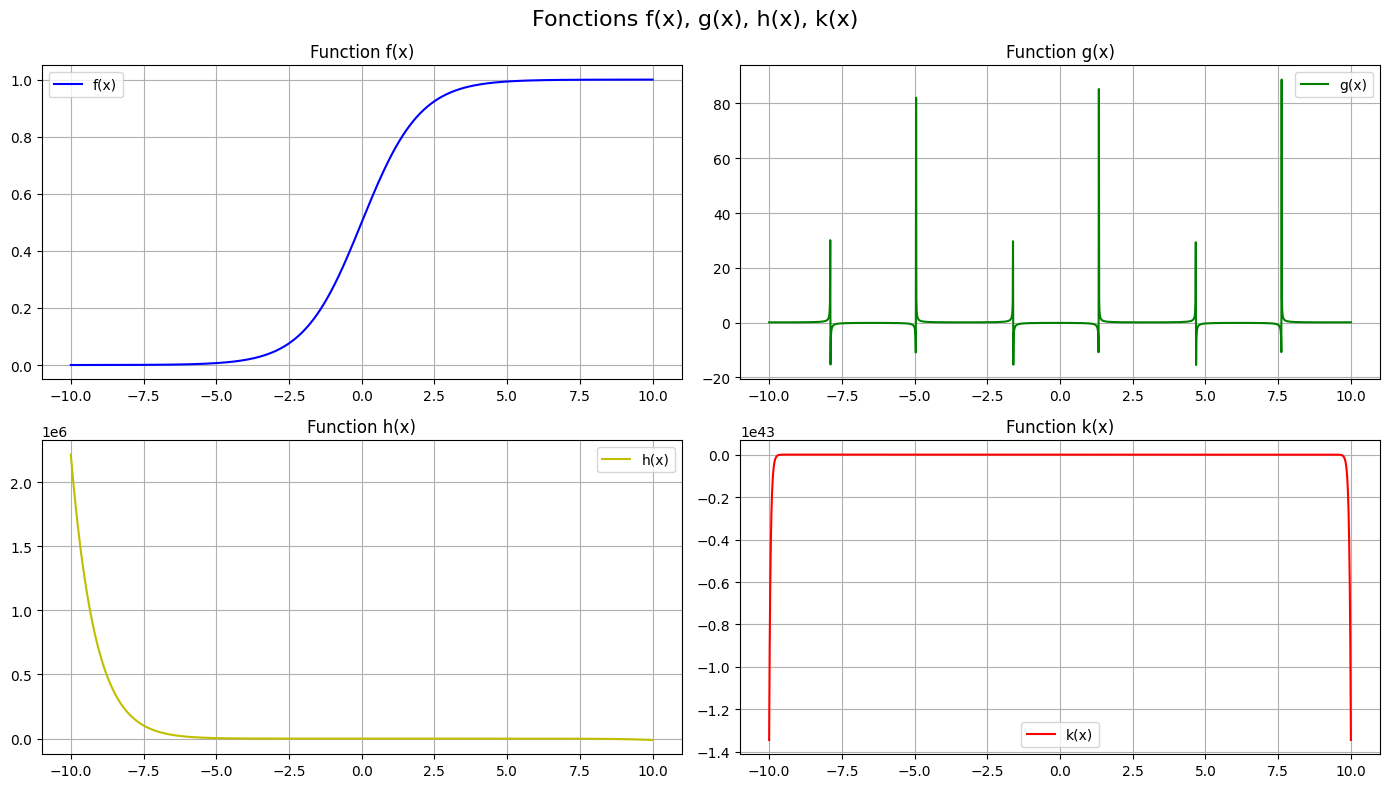

In [113]:
# Fonction globale qui contient les sous-fonctions f,g,h,k
def fonctions(x, fonction):
  if fonction == "f":
    return 1 / (1 + np.exp(-x))
  elif fonction == "g":
    return 1 / (10 * np.cos(x - 3) + np.sin(x)**2)
  elif fonction == "h":
    return x**2 * np.exp(-x) - np.sinh(x)
  elif fonction == "k":
    #traitement du point x = 0 séparément (pour eviter la division sur 0)
    return np.where(x != 0, np.sin(x) / x * np.cosh(x) - np.sinh(x**2), np.cosh(0) - np.sinh(0))

xVals = np.linspace(-10, 10, 2000)

figure = plt.figure(figsize=(14, 8))
figure.suptitle('Fonctions f(x), g(x), h(x), k(x)', fontsize=16)

axF = figure.add_subplot(221)
#dans chaque subplot on passe la liste des valeurs de x avec le nom de la fonction
axF.plot(xVals, fonctions(xVals, "f"), 'b', label='f(x)')
axF.set_title('Function f(x)')
axF.legend()
axF.grid(True)

axG = figure.add_subplot(222)
axG.plot(xVals, fonctions(xVals, "g"), 'g', label='g(x)')
axG.set_title('Function g(x)')
axG.legend()
axG.grid(True)

axH = figure.add_subplot(223)
axH.plot(xVals, fonctions(xVals, "h"), 'y', label='h(x)')
axH.set_title('Function h(x)')
axH.legend()
axH.grid(True)

axK = figure.add_subplot(224)
axK.plot(xVals, fonctions(xVals, "k"), 'r', label='k(x)')
axK.set_title('Function k(x)')
axK.legend()
axK.grid(True)

figure.tight_layout()
plt.show()